<a href="https://colab.research.google.com/github/Stephen-Njuguna/Customer-Churning-Project-/blob/main/Group_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**PREDICTING CHURNING CUSTOMERS**

**DEFINING THE QUESTION**

**a) Specifying the question**

Creating different models that can predict whether a customer churns or not given the customer's information.

**b) Defining the metric for success**

Picking a model with the highest accuracy score.

**c) Understanding the context**

Retaining customers is probably one of the hardest tasks that industries have to undertake; it is a measure of growth. According to news reported in the past, companies mostly invest in getting new customers rather than investing in the ones they have. Does it mean that getting new customers is way easier than retaining them? 
It is a given fact that the market is growing and competition continues to grow too. Customers churn because they are dissatisfied. Churning is a measure of the number of individuals moving out over a specific period. Credit card churning is the frequent opening of credit cards to get signed up on bonuses and then cancel them. 
Banks, in particular, require to constantly improve their services especially the credit card service in order to keep customers. They constantly “dish out” digital services and not really focus on how the customers feel about that particular service. They have not been able to maintain their premium customers, denting their revenue. On the other hand, they have tried sending out surveys to them to try and understand why they’re dissatisfied. Unfortunately, the surveys get a very poor response of about **5-30%**.

**d) Experimental design**

Below is the expected flow of our work:

* Data Cleaning and Preparation
 * Load libraries and dataset
 * Deal with missing values
 * Deal with duplicated records
* Perform EDA
  * Univariate Analysis
  * Bivariate Analysis
* Modelling
* Feature Engineering
* Instantiating the Classifiers
* Performance Evaluation
* Performance Analysis
* Conclusion

**e) Data relevance**

* CLIENTNUM - Unique identifier for the customer holding the account.
* Attrition_Flag - Internal event (customer activity) variable - if the account is closed then 1 else 0.
* Customer_Age - Demographic variable - Customer's Age in Years
* Gender - Demographic variable - M=Male, F=Female
* Dependent_count - Number of dependents
* Education_Level - Educational Qualification of the account holder (example: high school, college graduate, etc.)
* Marital_Status - Married, Single, Divorced, Unknown
* Income_Category - Annual Income Category of the account holder (< $40K, $40K - 60K, $60K - $80K, $80K-$120K, > $120K, Unknown)
* Card_Category - Type of Card (Blue, Silver, Gold, Platinum)
* Months_on_book - Period of relationship with bank
* Total_Relationship_Count - Total no. of products held by the customer
* Months_Inactive_12_mon - No. of months inactive in the last 12 months
* Contacts_Count_12_mon - No. of Contacts in the last 12 months
* Credit_Limit - Credit Limit on the Credit Card
* Total_Revolving_Bal - Total Revolving Balance on the Credit Card
* Avg_Open_To_Buy - Open to Buy Credit Line (Average of last 12 months)
* Total_Amt_Chng_Q4_Q1 - Change in Transaction Amount (Q4 over Q1)
* Total_Trans_Amt - Total Transaction Amount (Last 12 months)
* Total_Trans_Ct - Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1 - Change in Transaction Count (Q4 over Q1)
* Avg_Utilization_Ratio - Average Card Utilization Ratio





## **READING OUR DATA**

In [ ]:
# Importing our libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Loading our dataset

df=pd.read_csv('/content/BankChurners.csv')

In [ ]:
# Previewing the top of our dataset

df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [ ]:
# Previewing the bottom of our dataset

df.tail()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294
10126,714337233,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,6,2,4,10388.0,1961,8427.0,0.703,10294,61,0.649,0.189,0.996620,0.003377


In [ ]:
# Checking the data types

df.dtypes

CLIENTNUM                                                                                                                               int64
Attrition_Flag                                                                                                                         object
Customer_Age                                                                                                                            int64
Gender                                                                                                                                 object
Dependent_count                                                                                                                         int64
Education_Level                                                                                                                        object
Marital_Status                                                                                                                         object
Income

In [ ]:
# Checking the dimensions of our dataset

df.shape

(10127, 23)

## **DATA CLEANING**

In [ ]:
# Checking for null values

df.isnull().sum()

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

In [ ]:
# Checking for duplicates

df.duplicated().sum()

0

In [ ]:
# Selecting the necessary columns

df.drop(['CLIENTNUM','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],1, inplace=True)
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [ ]:
# Checking for anomalies

for i in df.columns:
  print(df[i].unique())
  print(('n/'))


['Existing Customer' 'Attrited Customer']
n/
[45 49 51 40 44 32 37 48 42 65 56 35 57 41 61 47 62 54 59 63 53 58 55 66
 50 38 46 52 39 43 64 68 67 60 73 70 36 34 33 26 31 29 30 28 27]
n/
['M' 'F']
n/
[3 5 4 2 0 1]
n/
['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate']
n/
['Married' 'Single' 'Unknown' 'Divorced']
n/
['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'Unknown']
n/
['Blue' 'Gold' 'Silver' 'Platinum']
n/
[39 44 36 34 21 46 27 31 54 30 48 37 56 42 49 33 28 38 41 43 45 52 40 50
 35 47 32 20 29 25 53 24 55 23 22 26 13 51 19 15 17 18 16 14]
n/
[5 6 4 3 2 1]
n/
[1 4 2 3 6 0 5]
n/
[3 2 0 1 4 5 6]
n/
[12691.  8256.  3418. ...  5409.  5281. 10388.]
n/
[ 777  864    0 ...  534  476 2241]
n/
[11914.  7392.  3418. ... 11831.  5409.  8427.]
n/
[1.335 1.541 2.594 ... 0.222 0.204 0.166]
n/
[ 1144  1291  1887 ... 10291  8395 10294]
n/
[ 42  33  20  28  24  31  36  32  26  17  29  27  21  30  16  18  23  22
  40  38  25  43  37  19 

- Attrition Flag and Gender have 2 unique values hence binary.

- Education Level and Income Catergory are ordinal columns. They both have clear ordering.

- Marital Status on the other hand is nominal. No Intrinsic ordering is needed on the categories.

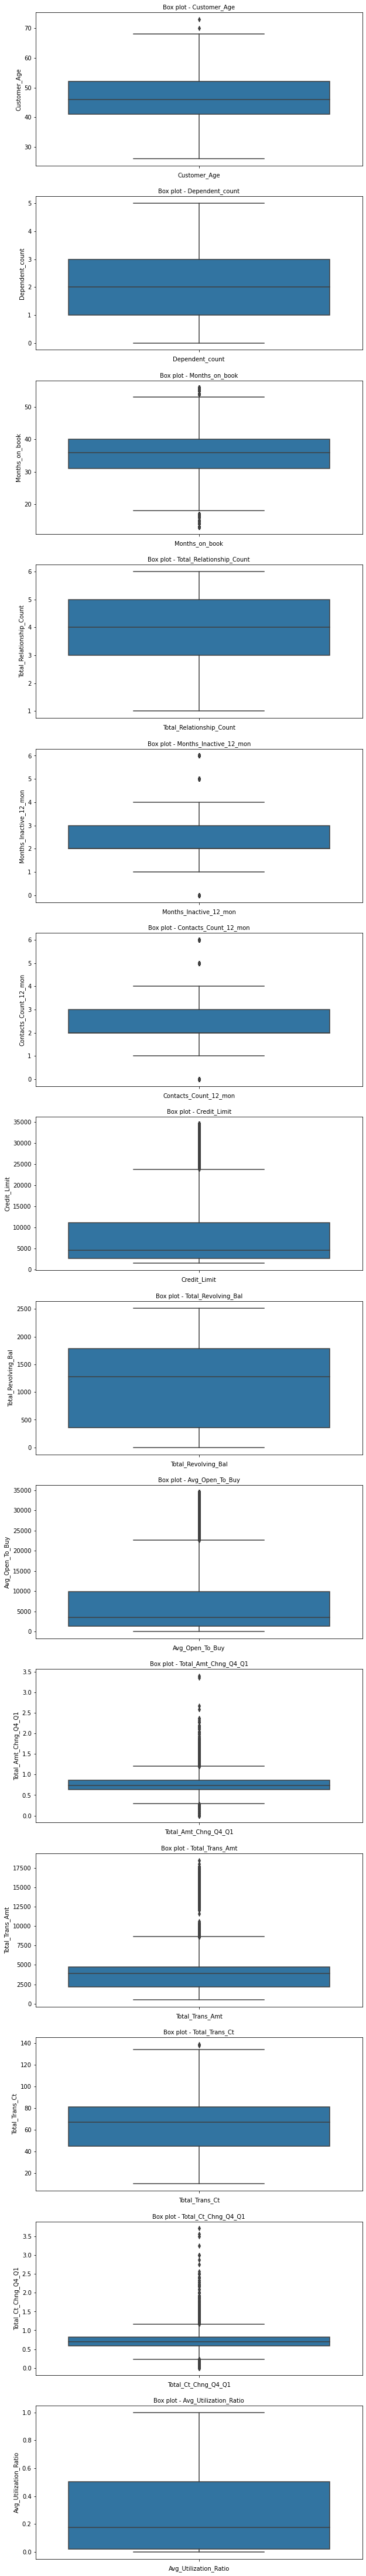

In [ ]:
# Checking for outliers

numerical=df.drop(['Attrition_Flag','Gender','Education_Level','Marital_Status','Income_Category','Card_Category'],1).columns
fig,ax = plt.subplots(len(numerical),figsize=(10,80))
for i , col_val in enumerate(numerical):
  sns.boxplot(y=df[col_val],ax=ax[i])
  ax[i].set_title('Box plot - {}'.format(col_val), fontsize =10)
  ax[i].set_xlabel(col_val,fontsize=10)
plt.show()

- Most of the Product Variables have existing Outliers.
 
- Since there's no basis to assume the entries are not valid observations, no outliers are dropped.

## **EXPLORATORY DATA ANALYSIS**

**Univariate Analysis**

In [ ]:
# Checking the statistical summary.

df.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


- Looking at the information on:
   - **Months on Book**: The minimum and maximum number of months is 13 and 56 respectively. The model created therefore will be good at predicting customers who are at least 1 year 1 month old and not more than 5 years.
   - **Total Relationship Count**:  6 is the highest number of Accounts a Customer had with the bank while 1 is the lowest number. Further analysis can be done to establish if any relationship exists between total number of accounts and Churning.
   - **Months Inactive**: The least Number of months a Customer stayed without carrying out any transaction with the card was 0 while the most was 6. Exploring to be done on whether the more inactive a customer stays the likely they are to churn.
   - **Contacts Count**: 6 is the most Number of times a Customer had contacted the Company in the past 12 months. The more the contact, the more they are likely to churn since it could be a case of Customer disatisfaction.

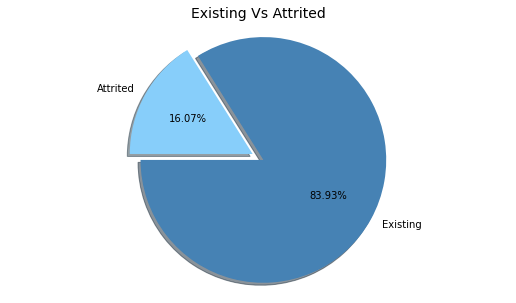

In [ ]:
#Viewing the ratio of churned customers:
Churn = df['Attrition_Flag'].value_counts()
Churn
# Existing Customers: 8500    Attrited/Lost Customer:  1627

#Visualizing the information on a pie chart:
labels= ['Existing','Attrited']
colors=['steelblue', 'lightskyblue']
fontsize = 14
plt.figure(figsize= (9, 5))
plt.title("Existing Vs Attrited", fontsize = fontsize)
plt.pie(Churn,labels=labels, colors=colors, startangle=180, shadow=True,explode=(0, 0.1), autopct='%1.2f%%')
plt.axis('equal')
plt.show()

16% of the customers churned while about 84% still have existing accounts.

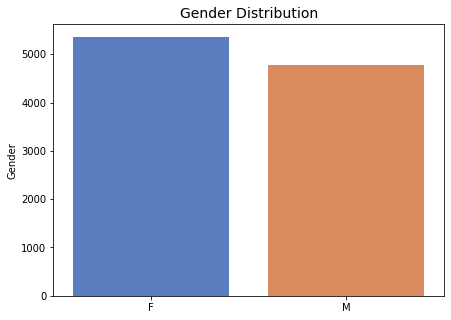

In [ ]:
#To view gender distribution:
Gender = df.Gender.value_counts()
Gender
# Males: 4,769       Females: 5,358

#Plotting observations:
plt.figure(figsize= (7,5))
fontsize = 14
plt.title("Gender Distribution", fontsize = fontsize)
sns.barplot(x=Gender.index, y=Gender, palette='muted');



In as much as majority of the Customers are Females, the distribution is relatively equal there being only around 6% more females than males.

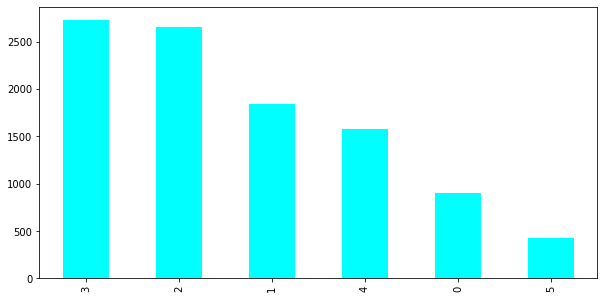

In [ ]:
# Checking the number of family members dependent on the customer.

plt.figure(figsize = (10,5))
df['Dependent_count'].value_counts().plot(kind = 'bar', color = 'Cyan')

Majority of the customers have 3 dependents.

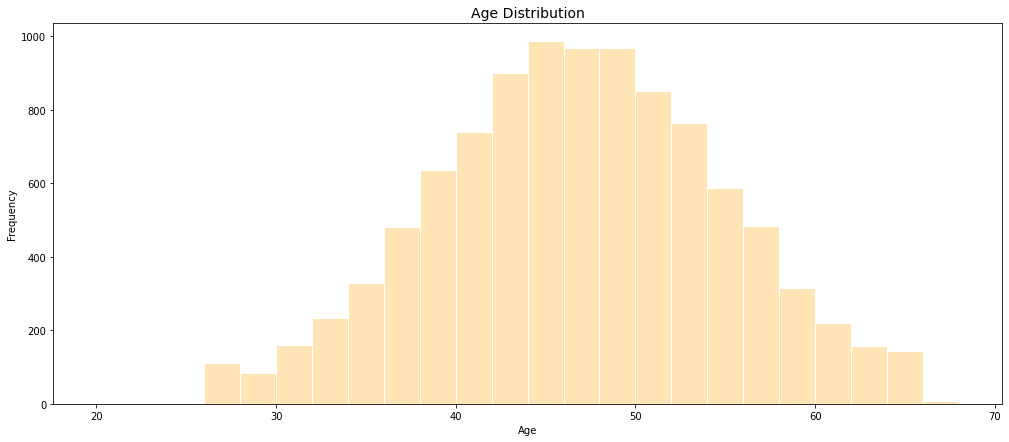

In [ ]:
# Checking the customer age distribution.

plt.figure(figsize= (17, 7))
fontsize = 14
plt.title('Age Distribution', fontsize = fontsize)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.hist(df.Customer_Age, bins= np.arange(20, 70, 2), color='moccasin', edgecolor='white');

Most of the customers are in the 40-50 age group.

In [ ]:
# Previewing the customer incomer.

df['Income_Category'].value_counts(normalize=True)*100

Less than $40K    35.163425
$40K - $60K       17.675521
$80K - $120K      15.157500
$60K - $80K       13.844179
Unknown           10.980547
$120K +            7.178829
Name: Income_Category, dtype: float64

Majority of the customers are earning less than 40k.

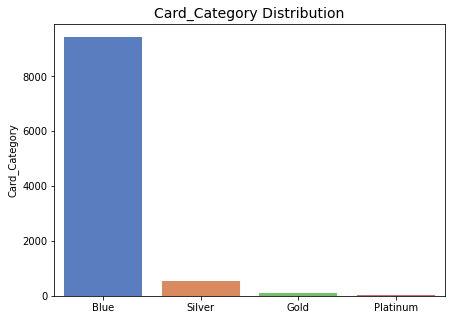

In [ ]:
#To view Card Category distribution:
Card_Category = df.Card_Category.value_counts()
Card_Category
# Males: 4,769       Females: 5,358

#Plotting observations:
plt.figure(figsize= (7,5))
fontsize = 14
plt.title("Card_Category Distribution", fontsize = fontsize)
sns.barplot(x=Card_Category.index, y=Card_Category, palette='muted');

Most customers have a blue card.

While Credit Card hierarchy might be different across institutions, the different colours can give a general idea of the Card’s credit limit and rewards features list.

Being that most of the customers from the data sampled earned less than $40K, Blue can easily be identified as the Standard Card with Silver and Gold being more prestigious.

[Platinum](https://www.canstar.com.au/credit-cards/colour-credit-card-mean/) on the other hand is usually considered as the top-tier/most expensive card.



**BIVARIATE ANALYSIS**

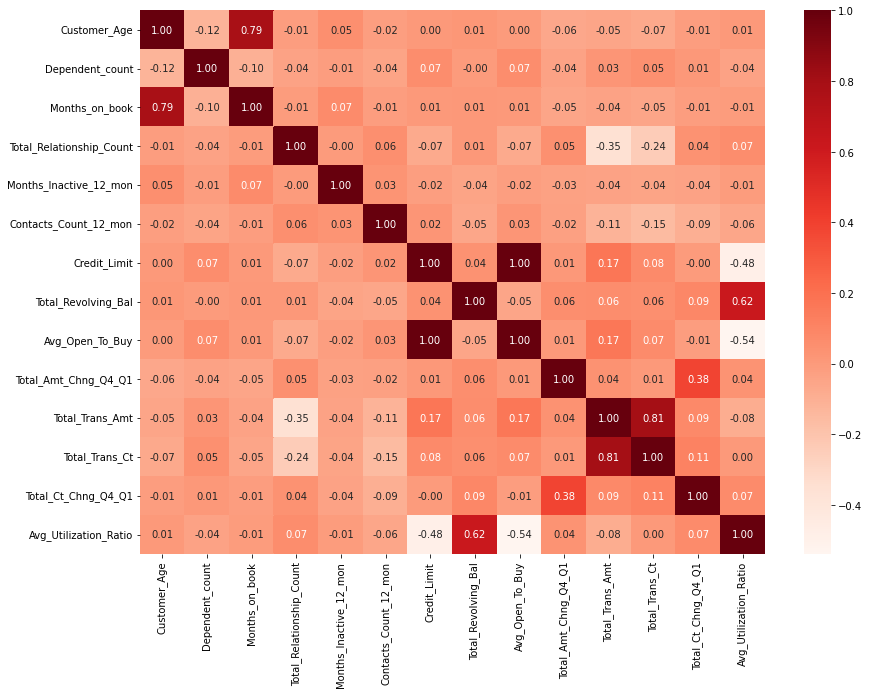

In [ ]:
#Plotting a heat map to show correlation between the different variables
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(),annot=True,cmap="Reds",fmt=".2f");
plt.show()

* Customer_age has a strong positive correlation with months_on_book.
* Total_Revolving_Bal has a moderate positive correlation with Avg_Utilization_Ratio.
* Total_trans_Amt has a strong positive correlation with Total_Trans_Ct.
* Credit_Limit has a perfect correlation with Avg_Open_To_Buy.

Average open to buy is a forecasting tool and is used to budget the financial assets needed per client, it is based of how much a client regularly spends, while the credit limit is a metric relating to trustworthiness of the client's source of income.Both of these may have high correlation but both are significantly important and cannot be removed.

This analysis aims to determine whether a relationship exists between any two given variables.

 - Customer attrition and Demographic Information

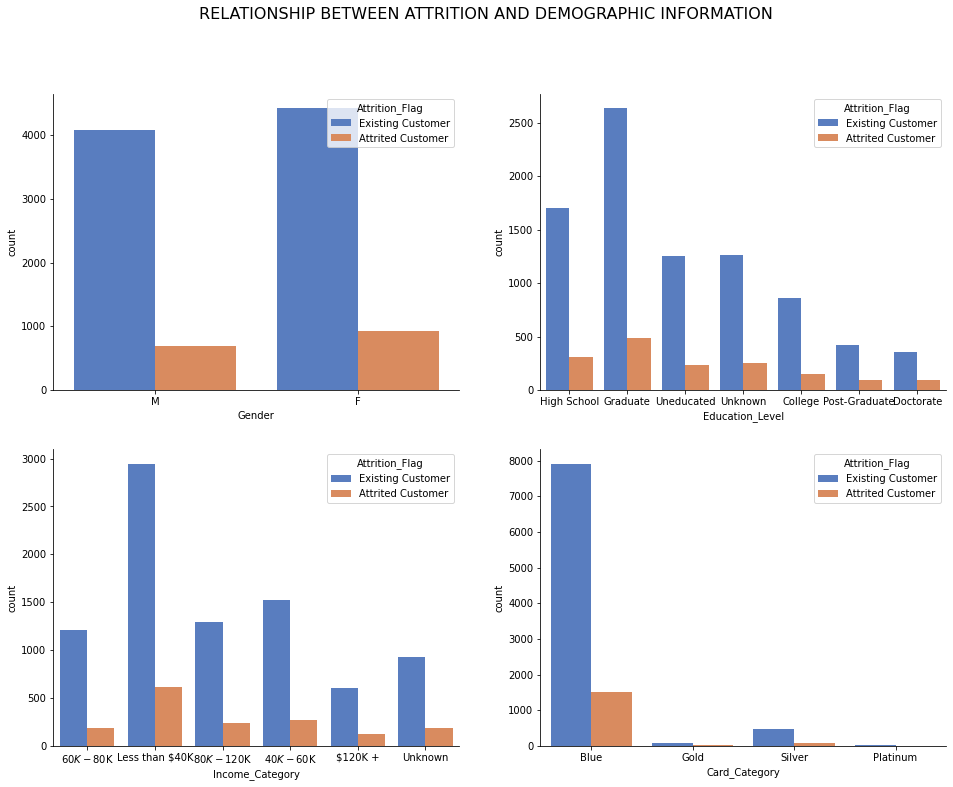

In [ ]:
#Viewing the influence Demographic Information  has on Customer Attrition:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
#Indicating the Title:
fig.suptitle('RELATIONSHIP BETWEEN ATTRITION AND DEMOGRAPHIC INFORMATION', fontsize = 16)
#Plotting the suplots:
sns.countplot(ax=axes[0, 0], data=df, x='Gender',hue='Attrition_Flag',palette='muted')
sns.countplot(ax=axes[0, 1], data=df, x='Education_Level',hue='Attrition_Flag',palette='muted')
sns.countplot(ax=axes[1, 0], data=df, x='Income_Category',hue="Attrition_Flag",palette='muted')
sns.countplot(ax=axes[1, 1], data=df, x='Card_Category',hue='Attrition_Flag',palette='muted')
sns.despine()

There appears to be no notable difference on Customer attrition with most of the demographics. The Customers likely to Churn are Females though the percentage of difference is not that significant, Graduates, those earning less than $40K and Blue Card users. 

- Customer Attrition and Product Information

Months on Books, Contact Counts, Total Relationship Count and Months Invactive 

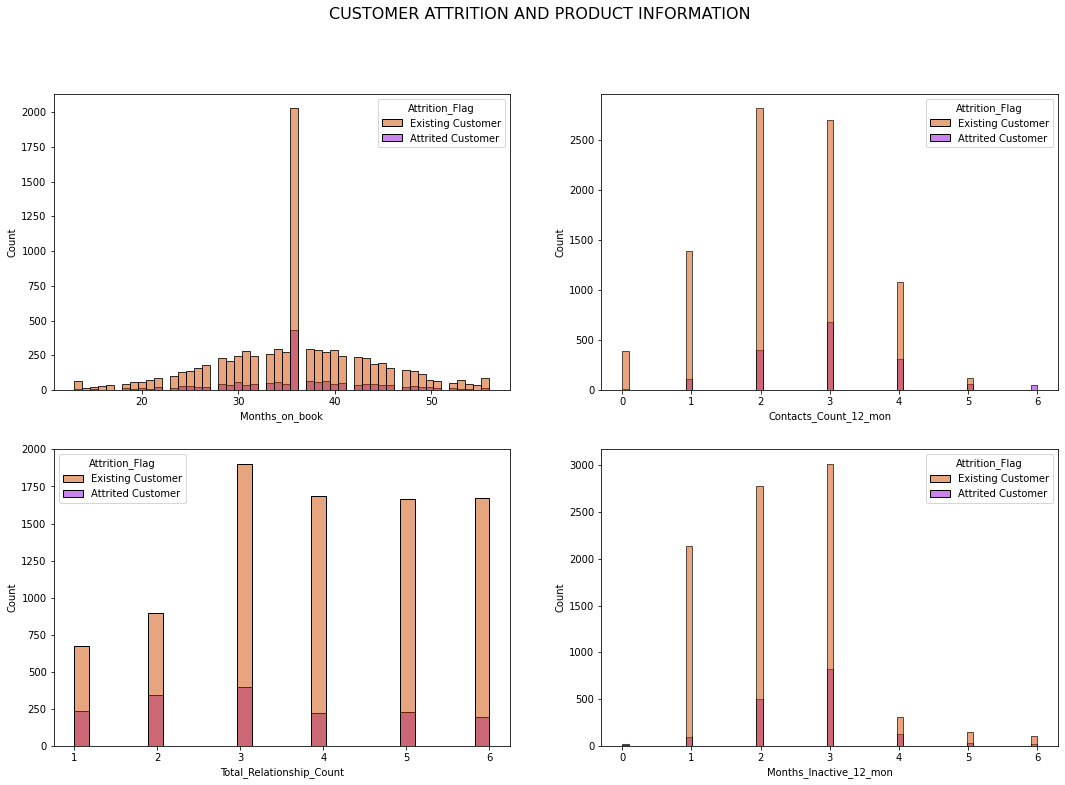

In [ ]:
#Viewing the influence Months on Books, Contacts count, Total Relationship Count and Months Inactive has on Customer Attrition:
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('CUSTOMER ATTRITION AND PRODUCT INFORMATION', fontsize = 16)
sns.histplot(ax=axes[0, 0], data =df, x='Months_on_book',hue='Attrition_Flag',palette='gnuplot_r')
sns.histplot(ax=axes[1, 0], data=df, x='Total_Relationship_Count',hue='Attrition_Flag',palette='gnuplot_r')
sns.histplot(ax=axes[1, 1], data=df, x='Months_Inactive_12_mon',hue='Attrition_Flag',palette='gnuplot_r')
sns.histplot(ax=axes[0, 1], data=df, x='Contacts_Count_12_mon',hue='Attrition_Flag',palette='gnuplot_r');

 - Observations:
   - **Months on Book**: Customers who have been with the Bank for long are not likely to churn.
   - **Contacts Count**: A customer who contacted the bank 6 times churned. The more the contact, the higher the likelihood.

   - **Total Relationship Count**:  Customers who hold more Accounts/Products with the bank are not likely to churn. 
   
   - **Months Inactive**: most of the active members (less than 3 months) can be found within the non churning customers.

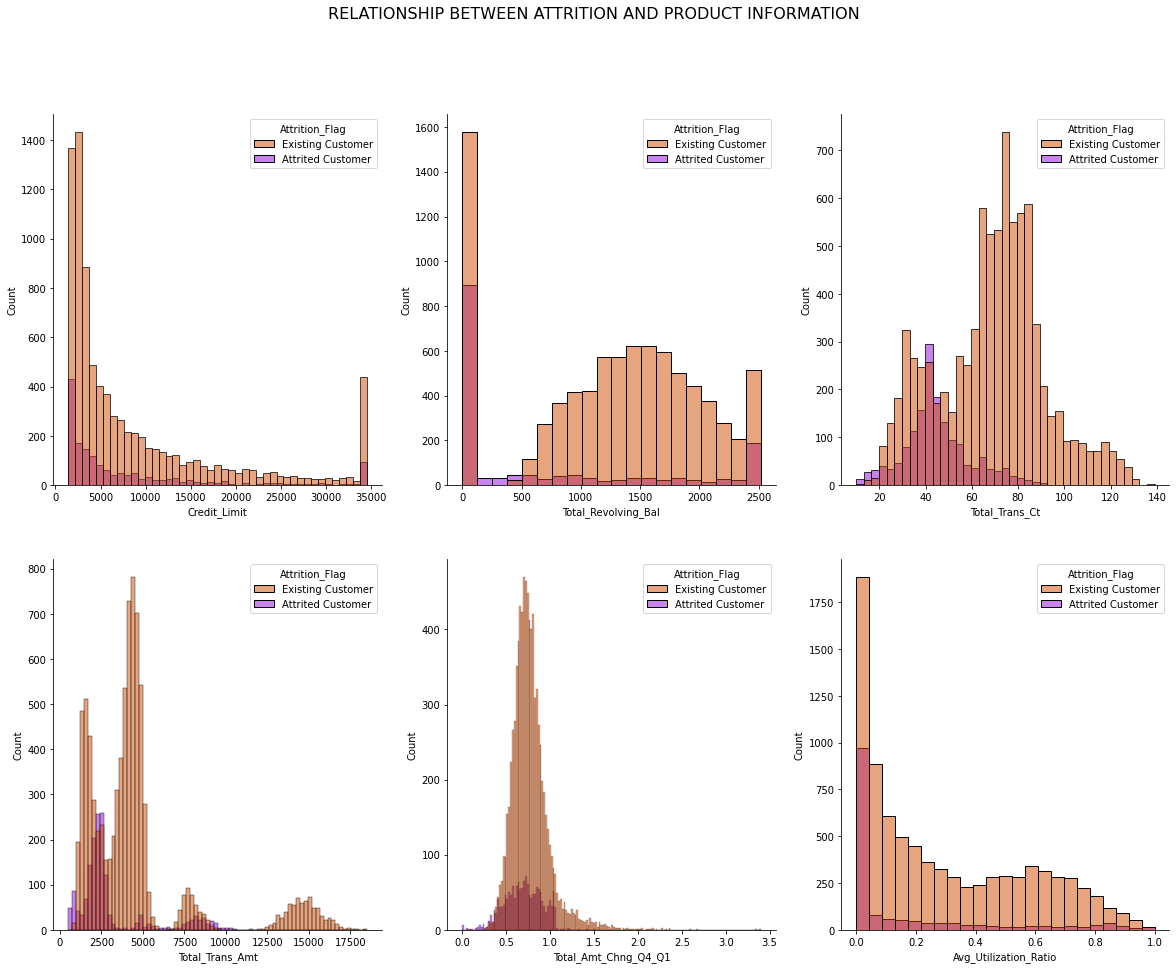

In [ ]:
# Checking the relationship between attrition and product information.

fig, axes = plt.subplots(2, 3, figsize=(20, 15))
fig.suptitle('RELATIONSHIP BETWEEN ATTRITION AND PRODUCT INFORMATION', fontsize = 16)
sns.histplot(ax=axes[0, 0], data =df, x='Credit_Limit',hue='Attrition_Flag',palette='gnuplot_r')
sns.histplot(ax=axes[0, 1], data=df, x='Total_Revolving_Bal',hue='Attrition_Flag',palette='gnuplot_r')
sns.histplot(ax=axes[0, 2], data=df, x='Total_Trans_Ct',hue='Attrition_Flag',palette='gnuplot_r')
sns.histplot(ax=axes[1, 0], data=df, x='Total_Trans_Amt',hue='Attrition_Flag',palette='gnuplot_r')
sns.histplot(ax=axes[1, 1], data =df, x='Total_Amt_Chng_Q4_Q1',hue='Attrition_Flag',palette='gnuplot_r')
sns.histplot(ax=axes[1, 2], data=df, x='Avg_Utilization_Ratio',hue='Attrition_Flag',palette='gnuplot_r')
sns.despine()

Observations:
- **Total Revolving Balance**: Customers that had a lower revolving balance were the most likely to leave. This could indicate that those customers could have left because they found other lower interest rates to other companies that offered better products at lower rates.
- **Total Trans Ct**:Customers who churn make fewer transactions using the bank's card than the customers that stay. This means that levels of inactivity are a contributing factor to churning.

- **Total Trans Amt**: Churning customers spend lesser than non churning customers therefore the lower the transaction amounts the higher the correlation with attrition.  
- **Avg Utilization Ratio**: the average card utilization ratio is higher for the existing customers.

Text(0.5, 0, 'Credit Limit')

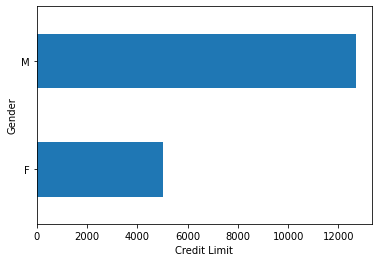

In [ ]:
# Checking the credit limit for each gender.

df.groupby('Gender')['Credit_Limit'].mean().plot(kind ='barh').set_xlabel(('Credit Limit'))

Male customers have a higher credit limit than female customers.

### **FEATURE ENGINEERING**

In [ ]:
# Replacing the unknown values with missing values.

df.replace('Unknown', np.nan, inplace = True)

# Replacing the missing values in each column with the mode of their respective columns.
unknown = df[['Income_Category','Education_Level','Marital_Status']]
for column in unknown:
    df[column].fillna(df[column].mode()[0], inplace=True)

In [ ]:
# Checking the unique values after replacing the missing values with the mode.

for i in df.columns:
  print(df[i].unique())
  print('n/')

['Existing Customer' 'Attrited Customer']
n/
[45 49 51 40 44 32 37 48 42 65 56 35 57 41 61 47 62 54 59 63 53 58 55 66
 50 38 46 52 39 43 64 68 67 60 73 70 36 34 33 26 31 29 30 28 27]
n/
['M' 'F']
n/
[3 5 4 2 0 1]
n/
['High School' 'Graduate' 'Uneducated' 'College' 'Post-Graduate'
 'Doctorate']
n/
['Married' 'Single' 'Divorced']
n/
['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +']
n/
['Blue' 'Gold' 'Silver' 'Platinum']
n/
[39 44 36 34 21 46 27 31 54 30 48 37 56 42 49 33 28 38 41 43 45 52 40 50
 35 47 32 20 29 25 53 24 55 23 22 26 13 51 19 15 17 18 16 14]
n/
[5 6 4 3 2 1]
n/
[1 4 2 3 6 0 5]
n/
[3 2 0 1 4 5 6]
n/
[12691.  8256.  3418. ...  5409.  5281. 10388.]
n/
[ 777  864    0 ...  534  476 2241]
n/
[11914.  7392.  3418. ... 11831.  5409.  8427.]
n/
[1.335 1.541 2.594 ... 0.222 0.204 0.166]
n/
[ 1144  1291  1887 ... 10291  8395 10294]
n/
[ 42  33  20  28  24  31  36  32  26  17  29  27  21  30  16  18  23  22
  40  38  25  43  37  19  35  15  41  57  12  14  34  44

In [ ]:
# Encoding the categorical variables.

from sklearn.preprocessing import LabelEncoder
categ= ['Attrition_Flag','Gender', 'Income_Category', 'Card_Category','Education_Level', 'Marital_Status']
le = LabelEncoder()
df[categ] = df[categ].apply(le.fit_transform)


### **LOGISTIC REGRESSION**

In [ ]:
# Creating our independent and dependent variables.
from sklearn.model_selection import train_test_split
X=df.drop(['Attrition_Flag'],1)
y=df[['Attrition_Flag']]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2, random_state=0)
#Feature Scaling:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [ ]:
# Dealing with class imbalance using smote technique.

from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [ ]:
# Splitting our train and test sets.

from sklearn.model_selection import train_test_split

X_train, X_test,y_train, y_test=train_test_split(X,y, test_size=.2, random_state=0)

In [ ]:
# Importing our model.

from sklearn.linear_model import LogisticRegression

# Training the model.
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

# Predicting using the trained model.

y_pred=LogReg.predict(X_test)
y_pred

array([0, 1, 1, ..., 0, 1, 0])

In [ ]:
# Evaluating the model.

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, explained_variance_score,classification_report


print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(explained_variance_score(y_test,y_pred))
print(classification_report(y_test,y_pred))


0.7776470588235294
[[1331  362]
 [ 394 1313]]
0.7838805970149254
0.11092748631378169
              precision    recall  f1-score   support

           0       0.77      0.79      0.78      1693
           1       0.78      0.77      0.78      1707

    accuracy                           0.78      3400
   macro avg       0.78      0.78      0.78      3400
weighted avg       0.78      0.78      0.78      3400



In [ ]:
# Optimizing our model.

from sklearn.model_selection import GridSearchCV

model = LogisticRegression()
param_grid = [{'penalty': ['l1', 'l2'], 
               'C': np.logspace(0, 4, 5),
               'solver' : ['lbfgs', 'newton-cg', 'liblinear','saga'],
               'max_iter' : [5, 10]
               }
              ]

#Creating grid search using 5-fold cross validation:
clf = GridSearchCV(model, param_grid = param_grid, cv=5, verbose=0, scoring = 'accuracy')

In [ ]:
import warnings
warnings.filterwarnings("ignore")
# Fitting grid search
best_clf = clf.fit(X_train, y_train)
#Predicting values based on the new parameters:
y_pred = best_clf.predict(X_test)
print('Best Penalty:', best_clf.best_estimator_.get_params()['penalty'])
print('Best C:', best_clf.best_estimator_.get_params()['C'])
print('Best Solver:', best_clf.best_estimator_.get_params()['solver'])
print('Best max_iter:', best_clf.best_estimator_.get_params()['max_iter'])
print('best_score',best_clf.best_score_)

Best Penalty: l1
Best C: 100.0
Best Solver: liblinear
Best max_iter: 10
best_score 0.8632352941176471


In [ ]:
#Model Selection using the best parameters:
model = LogisticRegression(penalty='l1', C=10.0, max_iter=10, solver='liblinear', random_state=0)

#Fitting the model:
model.fit(X_train,y_train )

LogisticRegression(C=10.0, max_iter=10, penalty='l1', random_state=0,
                   solver='liblinear')

In [ ]:
y_pred=model.predict(X_test)

Log= accuracy_score(y_test, y_pred)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(explained_variance_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.8514705882352941
[[1451  242]
 [ 263 1444]]
0.8564650059311981
0.40602487723840297
              precision    recall  f1-score   support

           0       0.85      0.86      0.85      1693
           1       0.86      0.85      0.85      1707

    accuracy                           0.85      3400
   macro avg       0.85      0.85      0.85      3400
weighted avg       0.85      0.85      0.85      3400



### **DECISION TREE**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Create a decision tree classifier

tree = DecisionTreeClassifier()

# Train it on our training set.
tree = tree.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = tree.predict(X_test)


from sklearn import metrics

# Model metrics.
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(explained_variance_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9511764705882353
[[1606   87]
 [  79 1628]]
0.9492711370262391
0.8047247167858554
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1693
           1       0.95      0.95      0.95      1707

    accuracy                           0.95      3400
   macro avg       0.95      0.95      0.95      3400
weighted avg       0.95      0.95      0.95      3400



In [ ]:
model=DecisionTreeClassifier()
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}
grid_search = GridSearchCV(estimator=model, 
                           param_grid=params, 
                           cv=4, n_jobs=1, verbose=1, scoring = "accuracy")

In [ ]:
grid_search.fit(X_train,y_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(), n_jobs=1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [ ]:
# Fitting grid search
best_clf = grid_search.fit(X_train, y_train)
#Predicting values based on the new parameters:
y_pred = best_clf.predict(X_test)
print('Best Max_depth:', best_clf.best_estimator_.get_params()['max_depth'])
print('Best Min_samples:', best_clf.best_estimator_.get_params()['min_samples_leaf'])
print('Best criterion:', best_clf.best_estimator_.get_params()['criterion'])
print('best_score',best_clf.best_score_)

Fitting 4 folds for each of 50 candidates, totalling 200 fits
Best Max_depth: 20
Best Min_samples: 5
Best criterion: entropy
best_score 0.9496323529411765


In [ ]:
#Model Selection using the best parameters:
model = DecisionTreeClassifier(max_depth=20, min_samples_split=5, criterion='entropy',random_state=0)

#Fitting the model:
model.fit(X_train,y_train )

DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_split=5,
                       random_state=0)

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
# Evaluating the model performance.

Dec= accuracy_score(y_test, y_pred)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(explained_variance_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9573529411764706
[[1623   70]
 [  75 1632]]
0.9588719153936546
0.8294175229960646
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1693
           1       0.96      0.96      0.96      1707

    accuracy                           0.96      3400
   macro avg       0.96      0.96      0.96      3400
weighted avg       0.96      0.96      0.96      3400



### **RANDOM FOREST**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

#Initiating the random forest classifier:
Forest = RandomForestClassifier(n_estimators = 100, random_state=42, min_samples_split = 500, max_depth=5)

#Fitting the model:
Forest.fit(X_train, y_train )

#Applying the trained model to make a prediction:
y_pred = Forest.predict(X_test)

In [ ]:
#Checking the accuracy of the test and train models:

print(f'Train Accuracy: {Forest.score(X_train, y_train):.2f}')
print(f'Test Accuracy: {Forest.score(X_test, y_test):.2f}')

Train Accuracy: 0.92
Test Accuracy: 0.91


In [ ]:
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(explained_variance_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.905
[[1529  164]
 [ 159 1548]]
0.9042056074766355
0.6200022076498874
              precision    recall  f1-score   support

           0       0.91      0.90      0.90      1693
           1       0.90      0.91      0.91      1707

    accuracy                           0.91      3400
   macro avg       0.91      0.90      0.90      3400
weighted avg       0.91      0.91      0.90      3400



In [ ]:
# Finding the best parameters.

model=RandomForestClassifier()
params = {'bootstrap': [True, False],
 'max_depth': [5, 10, 15],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=model, 
                           param_grid=params, 
                           cv=3, n_jobs=1, verbose=1, scoring = "accuracy")

In [ ]:
# Fitting grid search
best_clf = grid_search.fit(X_train, y_train)

print('Best bootstrap:', best_clf.best_estimator_.get_params()['bootstrap'])
print('Best min_samples_leaf:', best_clf.best_estimator_.get_params()['min_samples_leaf'])
print('Best Max_depth:', best_clf.best_estimator_.get_params()['max_depth'])
print('Best max_features:', best_clf.best_estimator_.get_params()['max_features'])
print('Best n_estimators:', best_clf.best_estimator_.get_params()['n_estimators'])
print('best_score',best_clf.best_score_)

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best bootstrap: False
Best min_samples_leaf: 1
Best Max_depth: 15
Best max_features: auto
Best n_estimators: 100
best_score 0.975588240436346


In [ ]:
#Model Selection using the best parameters:
model = RandomForestClassifier(bootstrap=False,max_depth=15, min_samples_leaf=1, max_features='auto',n_estimators=100)

#Fitting the model:
model.fit(X_train,y_train )

RandomForestClassifier(bootstrap=False, max_depth=15)

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
Ran= accuracy_score(y_test, y_pred)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(explained_variance_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9794117647058823
[[1674   19]
 [  51 1656]]
0.9886567164179104
0.9179999937715206
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1693
           1       0.99      0.97      0.98      1707

    accuracy                           0.98      3400
   macro avg       0.98      0.98      0.98      3400
weighted avg       0.98      0.98      0.98      3400



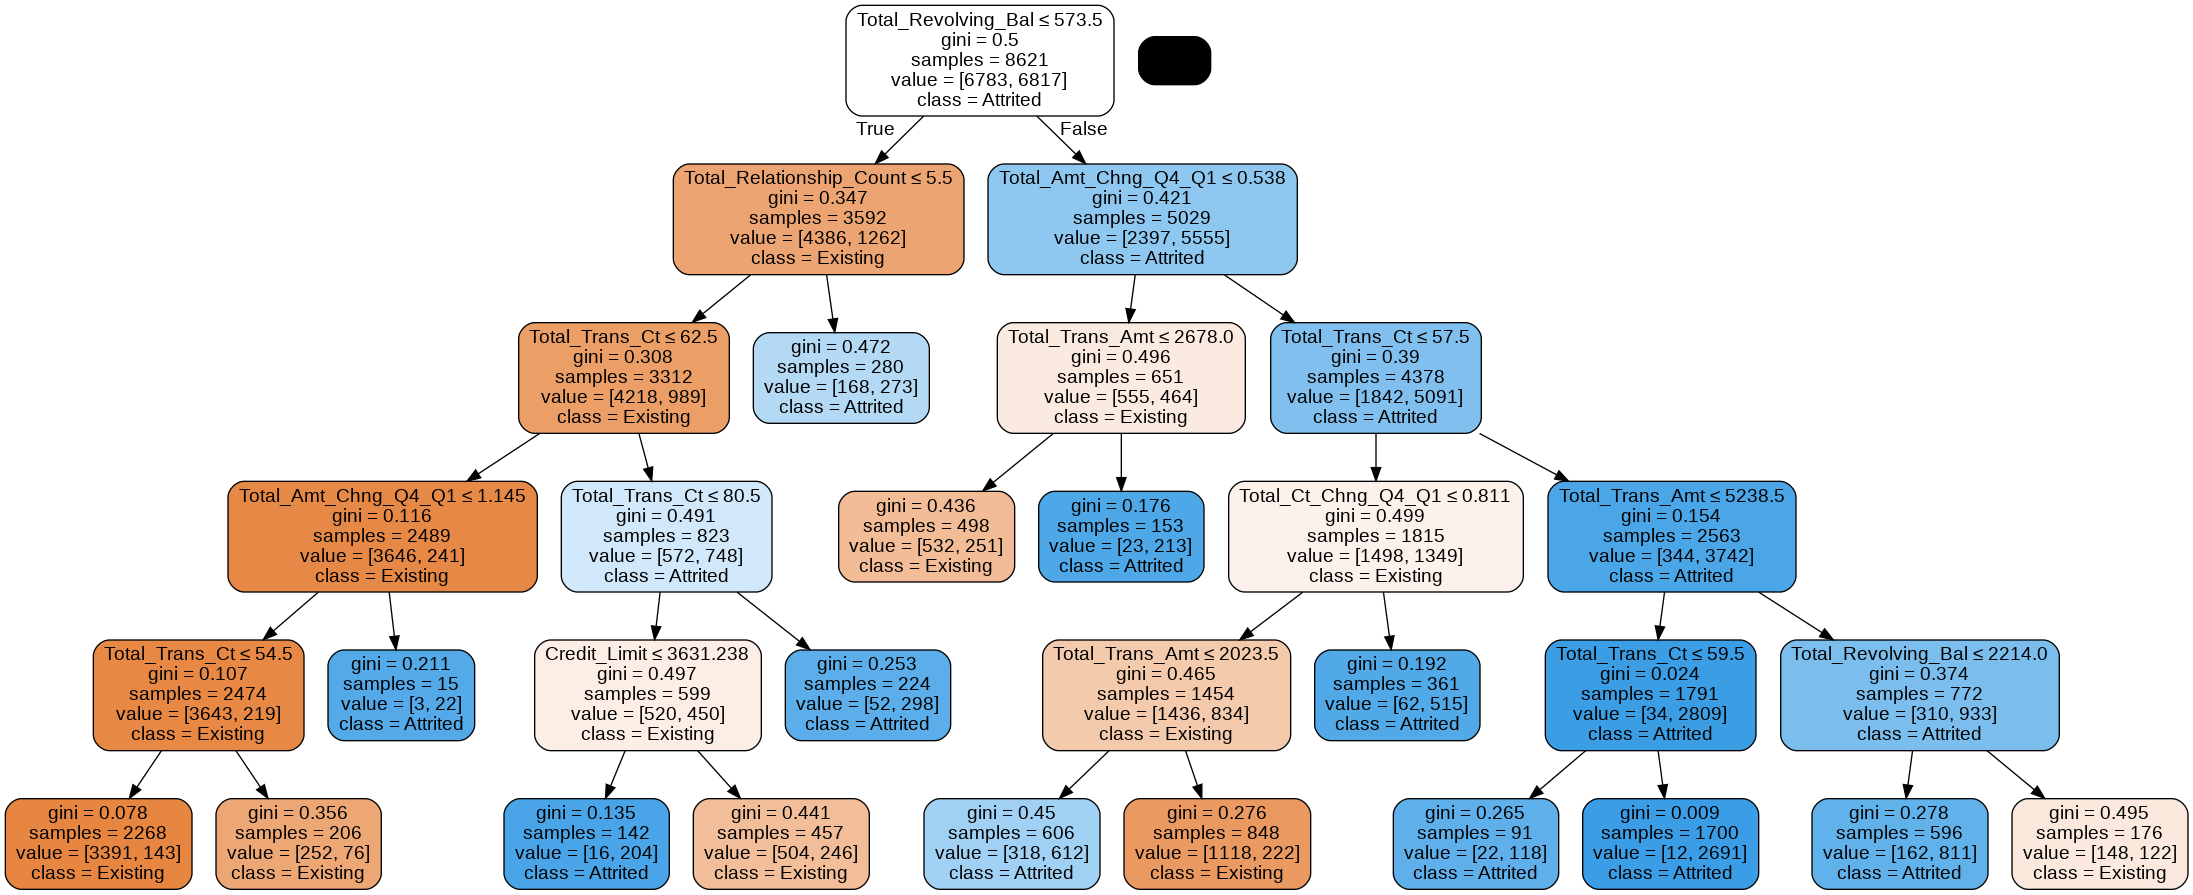

In [ ]:
# Defining our test features.

test_features = df.columns.to_list()
test_features.remove('Attrition_Flag')

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
# pick a specific tree from the forest
tree = Forest.estimators_[10]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = test_features,class_names=['Existing','Attrited'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('.png')
Image(graph.create_png())

In [ ]:
# Feature importance

#Viewing the Important Features:
Best_Features = pd.DataFrame({'Features': X.columns, 'Importance':Forest.feature_importances_})

#Displaying the features:
Best_Features.sort_values('Importance', ascending = False)

,Features,Importance
16,Total_Trans_Ct,0.238396
15,Total_Trans_Amt,0.211727
12,Total_Revolving_Bal,0.138538
17,Total_Ct_Chng_Q4_Q1,0.126739
18,Avg_Utilization_Ratio,0.090268
8,Total_Relationship_Count,0.071462
14,Total_Amt_Chng_Q4_Q1,0.035797
1,Gender,0.021409
9,Months_Inactive_12_mon,0.012682
13,Avg_Open_To_Buy,0.010763


### **LIGHTGBM**

In [ ]:
# Fitting our lightGBM classifier

import lightgbm as lgb
model = lgb.LGBMClassifier(learning_rate=0.09,max_depth=-5,random_state=42)
model.fit(X_train,y_train,eval_set=[(X_test,y_test),(X_train,y_train)],
          verbose=20,eval_metric='logloss')

[20]	training's binary_logloss: 0.177303	training's binary_logloss: 0.177303	valid_0's binary_logloss: 0.191634	valid_0's binary_logloss: 0.191634
[40]	training's binary_logloss: 0.0860165	training's binary_logloss: 0.0860165	valid_0's binary_logloss: 0.102867	valid_0's binary_logloss: 0.102867
[60]	training's binary_logloss: 0.0532112	training's binary_logloss: 0.0532112	valid_0's binary_logloss: 0.0735623	valid_0's binary_logloss: 0.0735623
[80]	training's binary_logloss: 0.0355964	training's binary_logloss: 0.0355964	valid_0's binary_logloss: 0.0593102	valid_0's binary_logloss: 0.0593102
[100]	training's binary_logloss: 0.0251045	training's binary_logloss: 0.0251045	valid_0's binary_logloss: 0.0521852	valid_0's binary_logloss: 0.0521852


LGBMClassifier(learning_rate=0.09, max_depth=-5, random_state=42)

In [ ]:
# Checking for overfitting.

print('Training accuracy {:.4f}'.format(model.score(X_train,y_train)))
print('Testing accuracy {:.4f}'.format(model.score(X_test,y_test)))

Training accuracy 0.9965
Testing accuracy 0.9821


In [ ]:
y_pred=model.predict(X_test)

In [ ]:
# Evaluating the model performance.

GBM= accuracy_score(y_test, y_pred)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(explained_variance_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9820588235294118
[[1668   25]
 [  36 1671]]
0.9852594339622641
0.9282759465471906
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1693
           1       0.99      0.98      0.98      1707

    accuracy                           0.98      3400
   macro avg       0.98      0.98      0.98      3400
weighted avg       0.98      0.98      0.98      3400



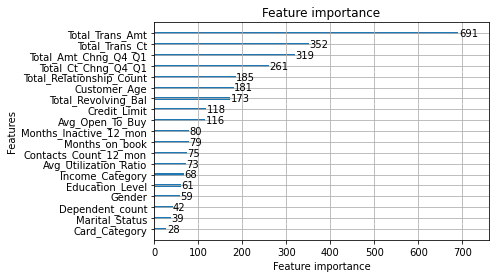

In [ ]:
lgb.plot_importance(model)

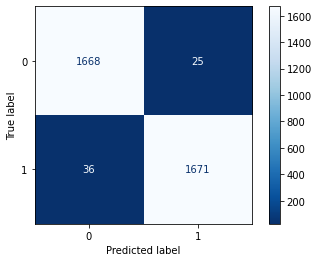

In [ ]:
metrics.plot_confusion_matrix(model,X_test,y_test,cmap='Blues_r')

### **SUPPORT VECTOR MACHINE**

In [ ]:
from sklearn.svm import SVC
# Let's now build the svm model 
model = SVC()
# Train the model using the training set
model.fit(X_train,y_train)

# Predict the response for the test set
y_pred = model.predict(X_test)
y_pred

array([1, 0, 1, ..., 0, 1, 1])

In [ ]:
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(explained_variance_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.7379411764705882
[[1276  417]
 [ 474 1233]]
0.7472727272727273
-0.04712882675173402
              precision    recall  f1-score   support

           0       0.73      0.75      0.74      1693
           1       0.75      0.72      0.73      1707

    accuracy                           0.74      3400
   macro avg       0.74      0.74      0.74      3400
weighted avg       0.74      0.74      0.74      3400



In [ ]:
# Optimizing our model

from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1, 1],
              'gamma': [1, 0.1]
}
svm_grid = GridSearchCV(model,param_grid=param_grid)
svm_grid.fit(X_train,y_train)

GridSearchCV(estimator=SVC(), param_grid={'C': [0.1, 1], 'gamma': [1, 0.1]})

In [ ]:
print(svm_grid.best_params_)

{'C': 1, 'gamma': 0.1}


In [ ]:
#Using the best parameters from hyperparameter tuning:
Final= SVC(C = 1, gamma = 0.1)

#Fitting the model:
Final.fit(X_train,y_train)

#Predicting values:
y_pred = Final.predict(X_test)

In [ ]:
Svm= accuracy_score(y_test, y_pred)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(explained_variance_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.5852941176470589
[[ 283 1410]
 [   0 1707]]
0.5476419634263715
0.02908388412121865
              precision    recall  f1-score   support

           0       1.00      0.17      0.29      1693
           1       0.55      1.00      0.71      1707

    accuracy                           0.59      3400
   macro avg       0.77      0.58      0.50      3400
weighted avg       0.77      0.59      0.50      3400



### **KNN**

In [ ]:
# Fitting our KNN classifier

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [ ]:
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(explained_variance_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9052941176470588
[[1610   83]
 [ 239 1468]]
0.9464861379754996
0.629590951542085
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1693
           1       0.95      0.86      0.90      1707

    accuracy                           0.91      3400
   macro avg       0.91      0.91      0.91      3400
weighted avg       0.91      0.91      0.91      3400



In [ ]:
#Hyperparameter Tuning using random search 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
neighbor_range = np.arange(1, 41)
knn = KNeighborsClassifier()

params = {'n_neighbors' : neighbor_range,
         'weights' : ['uniform', 'distance'],
         'metric' : ['manhattan', 'euclidean', 'minkowski']}

kfolds = KFold(n_splits = 5)
rscv = RandomizedSearchCV(knn, params, random_state = 0)
rscv.fit(X_train, y_train)
print("Best parameters:", rscv.best_params_)

Best parameters: {'weights': 'distance', 'n_neighbors': 15, 'metric': 'euclidean'}


In [ ]:
#Fittng the best parameters
knn_b = KNeighborsClassifier(n_neighbors=15, weights='distance',metric='euclidean')
#Train model 
knn_b.fit(X_train,y_train)
#Predict using model 
y_pred = knn_b.predict(X_test)

In [ ]:
Knn= accuracy_score(y_test, y_pred)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(explained_variance_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9070588235294118
[[1621   72]
 [ 244 1463]]
0.9530944625407166
0.6384658425004437
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1693
           1       0.95      0.86      0.90      1707

    accuracy                           0.91      3400
   macro avg       0.91      0.91      0.91      3400
weighted avg       0.91      0.91      0.91      3400



### **NAIVE BAYES**

In [ ]:
# Fitting our Naive Bayes model

from sklearn.naive_bayes import BernoulliNB

classifier=BernoulliNB()
classifier.fit(X_train,y_train)

# Making our prediction.

y_pred=classifier.predict(X_test)

In [ ]:
Bayes= accuracy_score(y_test, y_pred)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(explained_variance_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.6764705882352942
[[ 917  776]
 [ 324 1383]]
0.6405743399722094
-0.22344496498383548
              precision    recall  f1-score   support

           0       0.74      0.54      0.63      1693
           1       0.64      0.81      0.72      1707

    accuracy                           0.68      3400
   macro avg       0.69      0.68      0.67      3400
weighted avg       0.69      0.68      0.67      3400



### **NEURAL NETWORKS**

In [ ]:
from sklearn.neural_network import MLPClassifier
# Creating our model
mlp = MLPClassifier()

# fitting the data
mlp.fit(X_train,y_train)

y_pred=mlp.predict(X_test)

In [ ]:
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(explained_variance_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.6952941176470588
[[1683   10]
 [1026  681]]
0.9855282199710564
0.138343868114027
              precision    recall  f1-score   support

           0       0.62      0.99      0.76      1693
           1       0.99      0.40      0.57      1707

    accuracy                           0.70      3400
   macro avg       0.80      0.70      0.67      3400
weighted avg       0.80      0.70      0.67      3400



In [ ]:
param_grid = {
          'alpha': [0.0001, 0.05],
          'learning_rate': ['constant','adaptive'],
          'solver': ['adam', 'sgd', 'lbfgs']}
#Using the classifier along with grid search:
mlp=MLPClassifier()

#Creating grid search using 5-fold cross validation:
clf = GridSearchCV(mlp, param_grid = param_grid, cv= 5, verbose = 0, scoring = 'neg_mean_squared_error' )

#Fitting the grid search:
best_clf = clf.fit(X_train, y_train)

#Predicting values based on the new parameters:
y_pred = best_clf.predict(X_test)

In [ ]:
best_clf.best_params_

{'alpha': 0.0001, 'learning_rate': 'constant', 'solver': 'adam'}

In [ ]:
#Using the best parameters from hyperparameter tuning:
Final = MLPClassifier(activation = 'identity', alpha =  0.05, hidden_layer_sizes = (10,10,10),
                               learning_rate = 'constant', solver = 'adam',random_state=0)

#Fitting the model:
Final.fit(X_train,y_train )

#Predicting values:
y_pred = Final.predict(X_test)

In [ ]:
NN= accuracy_score(y_test, y_pred)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(explained_variance_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.6961764705882353
[[1212  481]
 [ 552 1155]]
0.7059902200488998
-0.21357040309679998
              precision    recall  f1-score   support

           0       0.69      0.72      0.70      1693
           1       0.71      0.68      0.69      1707

    accuracy                           0.70      3400
   macro avg       0.70      0.70      0.70      3400
weighted avg       0.70      0.70      0.70      3400



In [ ]:
# Model Comparison:
Models =  pd.DataFrame({'Model': ['Logistic Regression', 'Decision Tree', ' Random Forest', 
                               'SVM', 'KNN','Naive Bayes','Neural Network','LIGHTGBM'],
                     'Accuracy score': [Log*100, Dec*100, Ran*100, Svm*100, Knn*100, Bayes*100, NN*100,GBM*100 ]})
Models.sort_values(by = 'Accuracy score', ascending = False)

,Model,Accuracy score
7,LIGHTGBM,98.205882
2,Random Forest,98.088235
1,Decision Tree,95.382353
4,KNN,90.705882
0,Logistic Regression,83.823529
6,Neural Network,69.617647
5,Naive Bayes,67.647059
3,SVM,58.529412


## **CONCLUSION**


The best model to use is the Light Gradient Boosting Model.

* Confirming the conclusions on Bivariate analysis, the Product variables give more importance in determining whether or not a customer churns.

* The factors that make the model determine whether a customer will churn include, Total transaction amount, Total transaction count, Total revolving balance and Total amount Change Q4_Q1.

* Most of the attrited costumers are those with graduate level of education compared to the other levels with the lowest attrition levels coming from those post graduate.

* Most of the customers who are likely to churn out are those who earn  less than 40,000 a year.



 
  



## **RECOMMENDATIONS**

From our study, there are several recommendations we can deduce from the project above. They include:

* The bank should have a sort of promotion programme towards those customers with undergraduate degrees.

* The bank should look more into those earning less than 40000 a year and find a way to provide favourable services.

* Since the majority of the customers are between 40-50 years in age, the banks can create retention campaigns and loyalty programs such as VIP treatment, getting merchandise for them and giving for free, value customer week and offering cashbacks. This will make the customers feel valued and their needs taken care of which allows the company to have sustainable growth. Retaining the older ones will assure you of higher return of value.

* Most females are more likely to churn out. From the analysis we can see that women get a relatively low bargain when it comes to credit limits. The banks can form women groups to also encourage them on taking up business credit cards which will empower them to grow their ventures and let them know they have the bank's backing.

* Moreover, our model will be able to tell who's more likely to churn out even before they do. The bank can use this to their advantage since it acts as a warning to them on whom to follow up on. This way, they can have a team that can approach the suspected clients and see how they can improve their services to their liking. But not to forget, they may also need to consider the clients with high debts and not really encourage them to undertake any more credit usage.

